In this notebook we will visualize filters for edge detection and apply Fourier transform to assess difference in performance. 

### Libraries loading 

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

### Create filters 

We will visualize several filters for edge detection and apply on examples:
- High pass Sobel_x/ Sobel_y filters for **vertical and horizontal detection**;
- Laplacian filter;
- Low pass Gaussian blur filter.



In [4]:
# Sobel x filter for vertical edge detection
sobel_x =np.array([[-2,0,2],
                   [-1,0,1],
                   [-2,0,2]])

# Sobel y filter for horizontal edge detection
sobel_y =np.transpose(sobel_x)

gaussian_blur = (1/9)*np.array([[1, 1, 1],
                                [1, 1, 1],
                                [1, 1, 1]]) 
# laplacian, edge filter
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

In [13]:
filters = [sobel_x, sobel_y, gaussian_blur, laplacian]
filter_name = ['sobel_x', \
                'sobel_y', 'gaussian', 'laplacian']

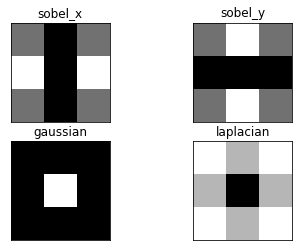

In [14]:
# perform a fast fourier transform on each filter
# and create a scaled, frequency transform image
f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in fshift]

# display 4 filters
for i in range(len(filters)):
    plt.subplot(2,2,i+1),plt.imshow(frequency_tx[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

In [15]:
image = cv2.imread('example images/curved_lane.jpg')
image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray_blur = cv2.GaussianBlur(gray, (5,5), 0)

Text(0.5, 1.0, 'High Pass filter: Blurred image')

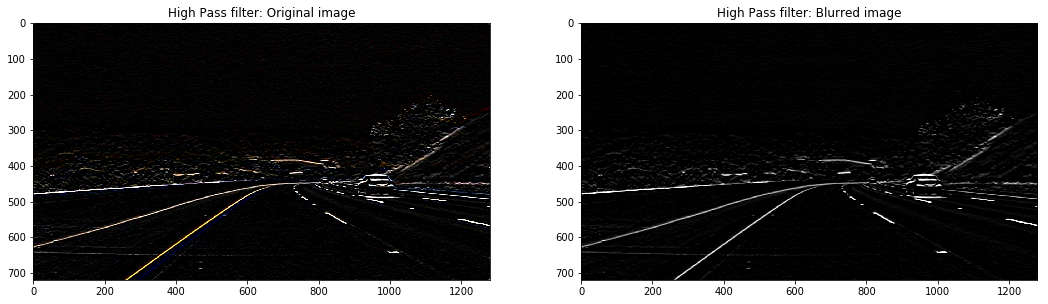

In [11]:
filter_orig = cv2.filter2D(image_copy, -1, sobel_y)
filter_blur = cv2.filter2D(gray_blur, -1, sobel_y)

f, (ax1, ax2) = plt.subplots(1,2, figsize = (18,7))

ax1.imshow(filter_orig, cmap='gray')
ax1.set_title('High Pass filter: Original image')

ax2.imshow(filter_blur, cmap='gray')
ax2.set_title('High Pass filter: Blurred image')

Text(0.5, 1.0, 'Laplacian filter: Blurred image')

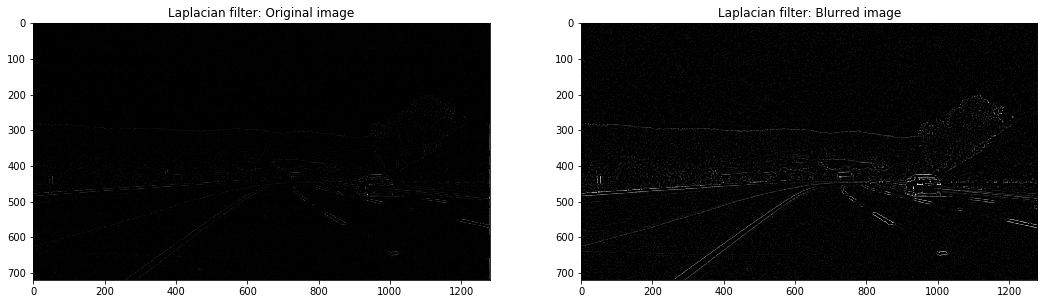

In [12]:
laplacian_orig = cv2.filter2D(image_copy, -1, laplacian)
laplacian_blur = cv2.filter2D(gray_blur, -1, laplacian)

f, (ax1, ax2) = plt.subplots(1,2, figsize = (18,7))

ax1.imshow(laplacian_orig, cmap='gray')
ax1.set_title('Laplacian filter: Original image')

ax2.imshow(laplacian_blur, cmap='gray')
ax2.set_title('Laplacian filter: Blurred image')

Note, that **Laplacian** filter is **High pass filter** too.<br>
Areas of white or light gray will allow high frequencies pass through, while black areas mean, that these parts of spectrum will be blocked out of an image.<br>
High pass filtes like Sobel x,y (depends on orientation) and Laplacian (all edge, regardless of orientation) block low frequencies, allowing **high frequencies go through**. <br>
Meanwhile, Gaussian filter will let them through, allowing **low frequencies go through**.